# mplfinanceライブラリを用いた株価チャートの描画

## 分析環境の構築

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import mplfinance as fplt
import datetime
import yfinance as yf

## 株価データの取得

In [2]:
start = "2023-4-1"
end = datetime.date.today()
ticker = "9983.T"
yf.pdr_override()
# yahooサイトからデータをダウンロード
df = pdr.get_data_yahoo(ticker, start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,29070.0,29670.0,29070.0,29665.0,29665.0,1573000
2023-04-04,29365.0,30020.0,29335.0,29970.0,29970.0,1641300
2023-04-05,29795.0,30040.0,29280.0,29395.0,29395.0,1644300
2023-04-06,29350.0,29610.0,28975.0,29085.0,29085.0,1454700
2023-04-07,29350.0,29380.0,28905.0,29065.0,29065.0,729100


## チャートの描画

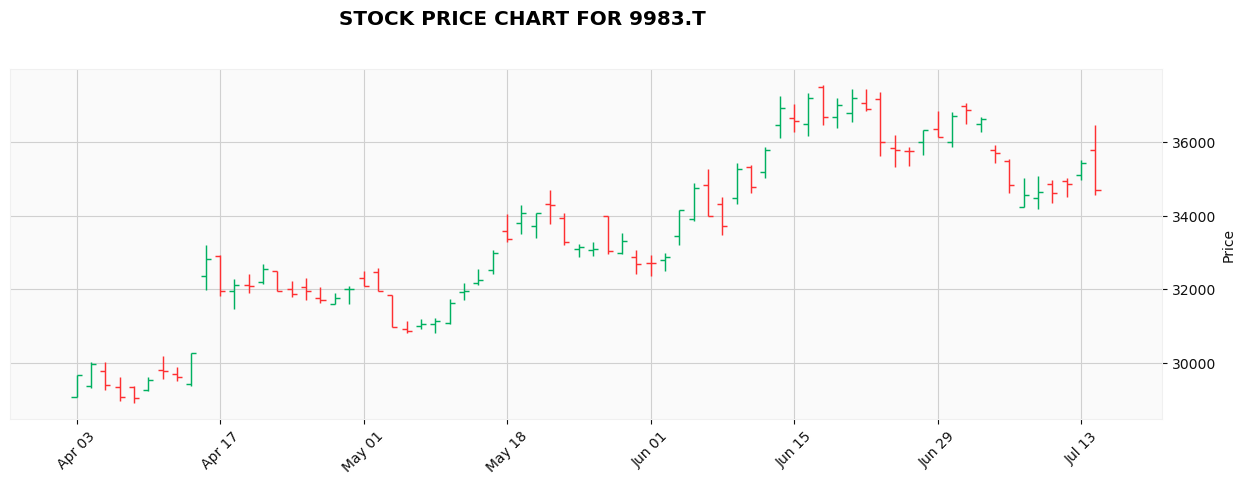

In [3]:
# 指定可能なtype: 'ohlc'(default), 'candle', 'line', 'renko', 'pnf'
fplt.plot(df,type='ohlc',figsize =(16,5), style='yahoo',
          title = "STOCK PRICE CHART FOR {0}".format(ticker))

## 水平線を入れる

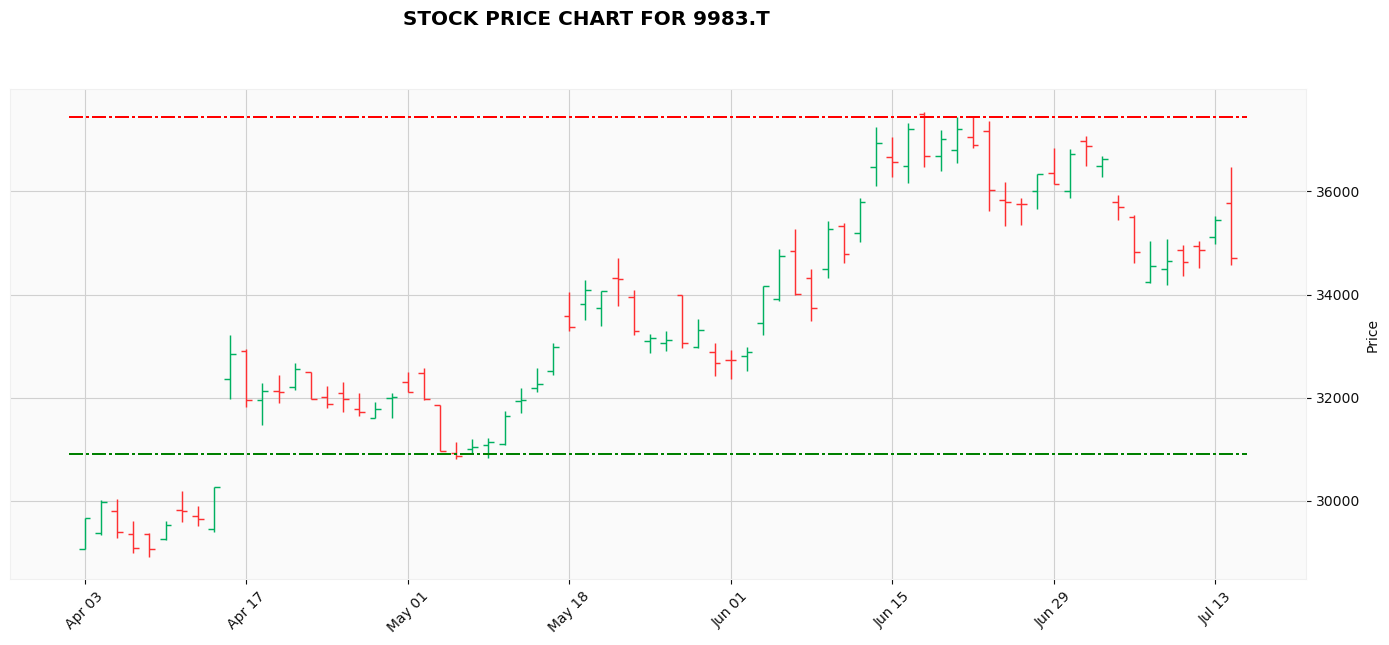

In [4]:
fplt.plot(df,type='ohlc',style='yahoo',figsize =(18,7),
          hlines=dict(hlines=[30900,37450], colors=['g','r'],linestyle='-.'),
          title = "STOCK PRICE CHART FOR {0}".format(ticker))

## 垂直線を入れる

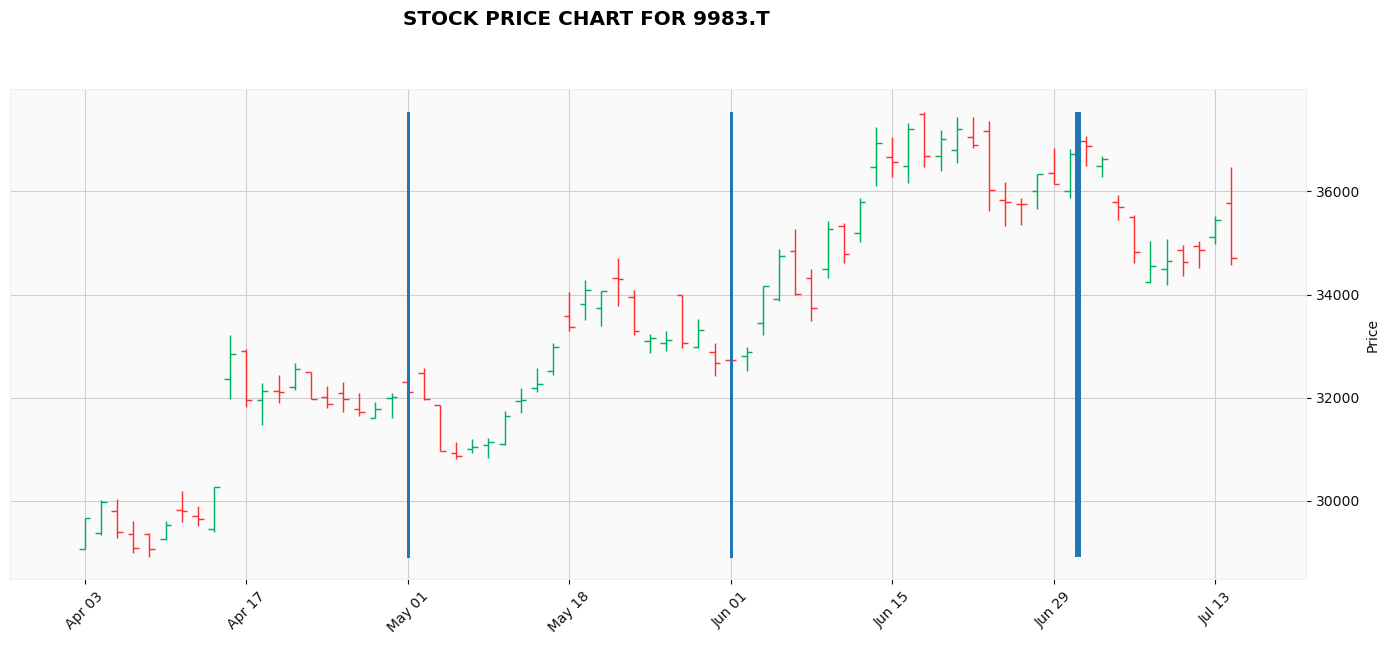

In [5]:
fplt.plot(df,type='ohlc',style='yahoo',figsize =(18,7),
          vlines=dict(vlines=['2023-05-01','2023-06-01','2023-07-01'],linewidths=(1,2,3)),
          title = "STOCK PRICE CHART FOR {0}".format(ticker))

## ある期間をハイライトする

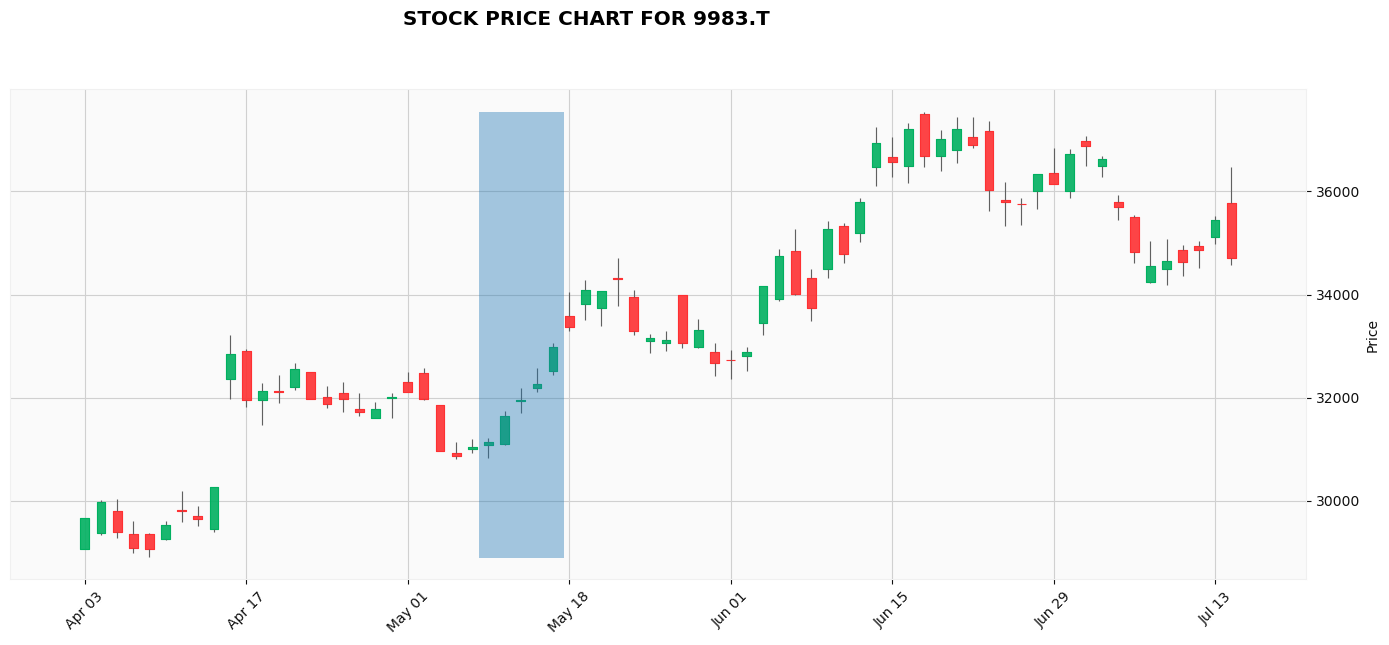

In [6]:
fplt.plot(df,type='candle',style='yahoo',figsize =(18,7),
          vlines=dict(vlines='2023-05-15',linewidths=60,alpha=0.4),
          title = "STOCK PRICE CHART FOR {0}".format(ticker))

## 任意の数の点を通る直線をひく

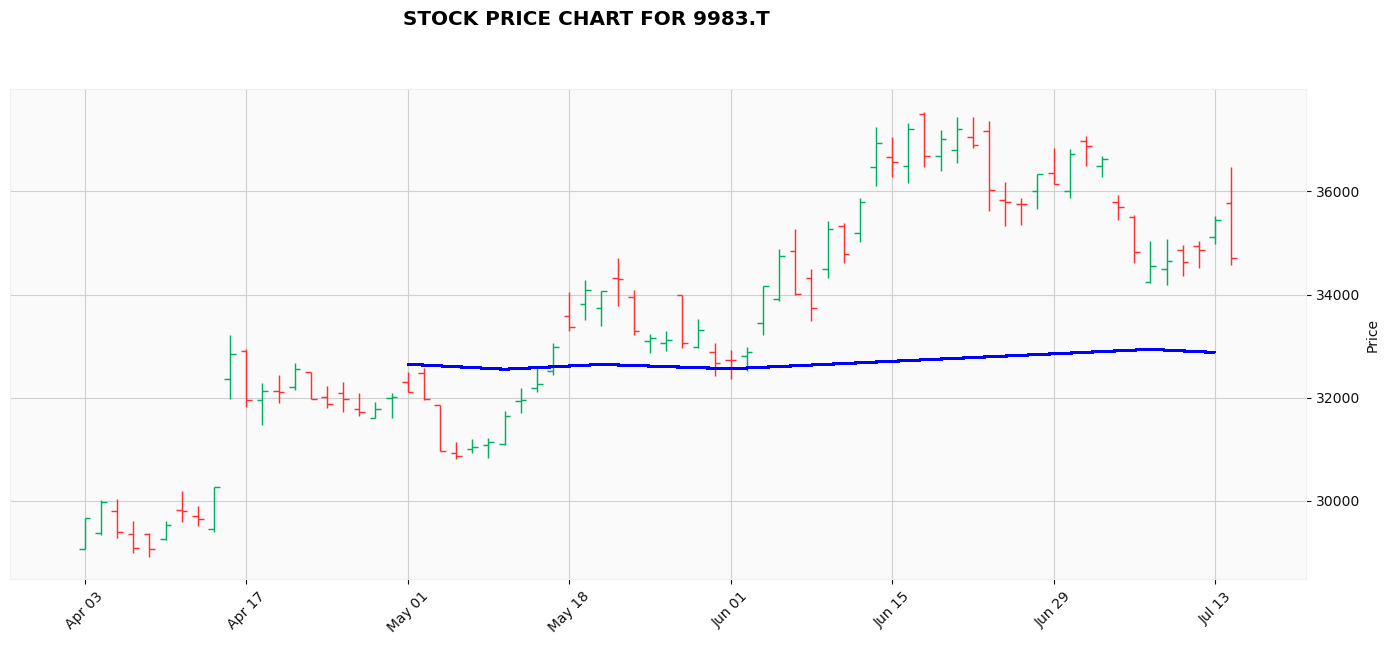

In [7]:
seq_of_points=[('2023-05-01',32647),('2023-05-12',32550),
               ('2023-05-22',32643),('2023-06-01',32559),
               ('2023-07-07',32936),('2023-07-13',32875)]
fplt.plot(df,type='ohlc',style='yahoo',figsize =(18,7),
          alines=dict(alines=seq_of_points,colors='b'),
          title = "STOCK PRICE CHART FOR {0}".format(ticker))

## 日付のみを指定してトレンドラインをひく

In [8]:
# トレンドラインを結ぶ日付の指定
dates = ['2023-04-07','2023-07-10']
# 中間点がある場合の処理
datepairs = [(d1,d2) for d1,d2 in zip(dates,dates[1:])]
datepairs

[('2023-04-07', '2023-07-10')]

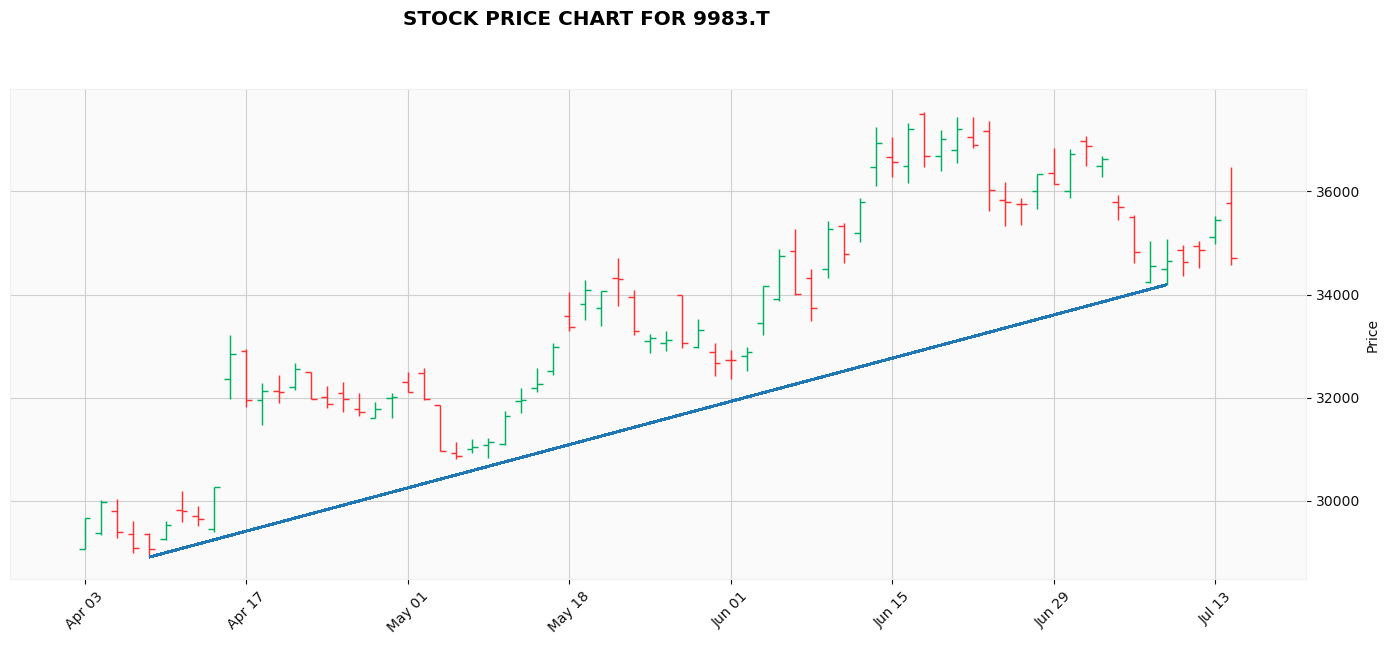

In [9]:
fplt.plot(df,type='ohlc',style='yahoo',figsize =(18,7),
          tlines=dict(tlines=datepairs,tline_use='low'),
          title = "STOCK PRICE CHART FOR {0}".format(ticker))

## 異なる基準のトレンドラインを同時にひく

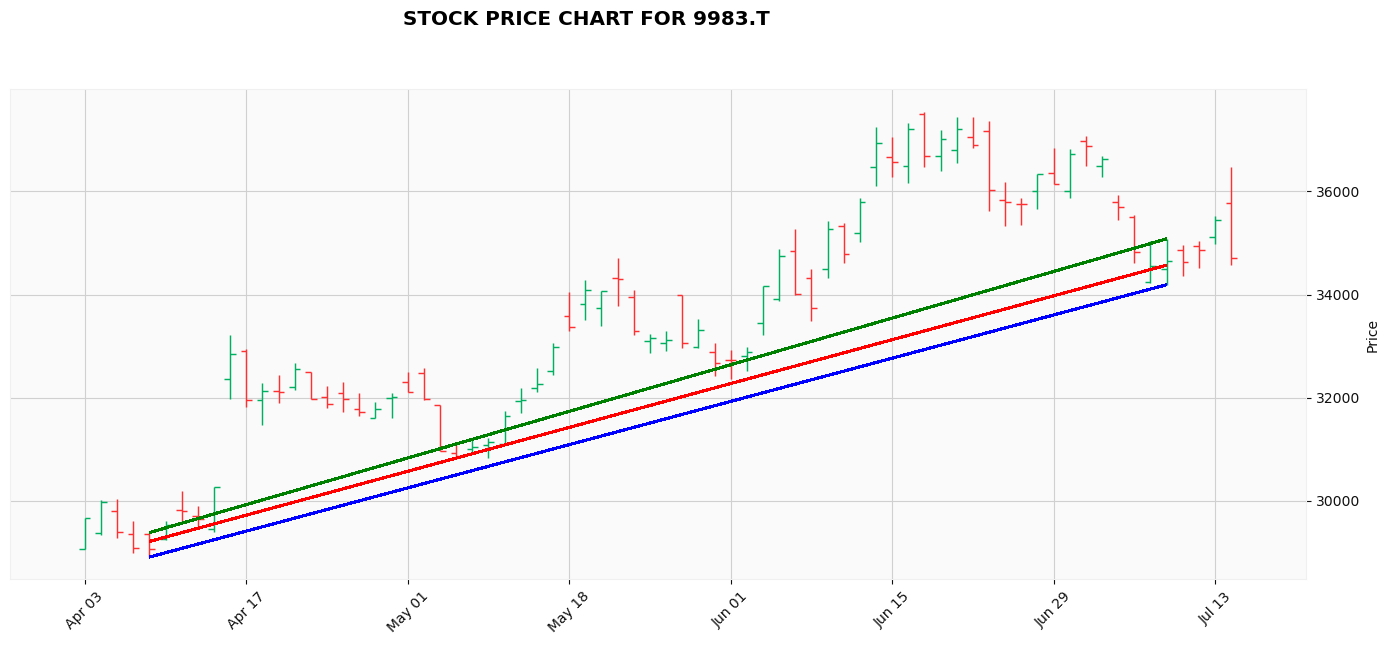

In [10]:
# Using the same date pairs as above, we can display trend lines using the 'high', the 'low', or the average of the 'open' and 'close'
fplt.plot(df,type='ohlc',style='yahoo',figsize =(18,7),
          tlines=[dict(tlines=datepairs,tline_use='high',colors='g'),
                dict(tlines=datepairs,tline_use='low',colors='b'),
                dict(tlines=datepairs,tline_use=['open','close'],colors='r')],
          title = "STOCK PRICE CHART FOR {0}".format(ticker))